In [212]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import root_mean_squared_log_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [213]:
data = pd.read_csv('../cleaned_dataset_without_na.csv', delimiter='|')
data.head()

,title,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
0,"Apartament inwestycyjny, ostatnie piętro, k/Sk...",24.89,1.0,4-6,secondary,0,1,2022.0,1.0,Mieszkanie,0.0,16749.98,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
1,Apartament inwestycyjny Śląska 12 z umową najmu!,25.72,1.0,0,secondary,0,1,2022.0,1.0,Mieszkanie,0.0,18500.00,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
2,"Nowe mieszkanie, wykończone - Mariana Kołodzieja",34.38,2.0,1-3,secondary,1,1,2022.0,1.0,Mieszkanie,0.0,15997.67,1,0,0,mariana kołodzieja,ujeścisko-łostowice,gdansk,54.334542,18.585750
3,"Wyjątkowe mieszkanie w centrum Gdyni, blisko l...",101.58,4.0,4-6,secondary,0,1,1997.0,1.0,Mieszkanie,0.0,11468.79,0,0,0,janusza korczaka,redłowo,gdynia,54.494118,18.543134
4,Mieszkanie w świetnej lokalizacji Gdynia Dąbrowa,68.00,3.0,1-3,secondary,0,0,2000.0,1.0,Mieszkanie,1.0,10279.41,1,0,0,oliwkowa,dąbrowa,gdynia,54.471180,18.470508


In [214]:
data.describe()

,area,number_of_rooms,parking,elevator,year_of_creation,internet,basement,price_for_m2_in_PLN,balcony,garden,terrace,latitude,longtitude
count,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000
mean,61.512499,2.733008,0.611888,0.532329,2003.080801,0.436212,0.360129,14460.779525,0.588790,0.138174,0.090322,54.390655,18.563264
std,27.520431,0.928739,0.487340,0.498974,30.972408,0.495935,0.480058,6502.241837,0.492073,0.345096,0.286654,0.344514,1.816736
min,1.000000,1.000000,0.000000,0.000000,1836.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,32.828866,-86.789292
25%,44.000000,2.000000,0.000000,0.000000,1989.000000,0.000000,0.000000,10649.860000,0.000000,0.000000,0.000000,54.348854,18.467438
50%,56.000000,3.000000,1.000000,1.000000,2019.000000,0.000000,0.000000,13093.000000,1.000000,0.000000,0.000000,54.424062,18.558077
75%,72.000000,3.000000,1.000000,1.000000,2024.000000,1.000000,1.000000,17558.540000,1.000000,0.000000,0.000000,54.471546,18.607162
max,205.000000,5.000000,1.000000,1.000000,2028.000000,1.000000,1.000000,57988.170000,1.000000,1.000000,1.000000,62.097038,126.699790


In [215]:
data = data.drop('title', axis=1)

In [261]:
threshold_low = 5000  # Set your threshold value here
threshold_high = 30000
data = data[data['price_for_m2_in_PLN'] >= threshold_low]
data = data[data['price_for_m2_in_PLN'] <= threshold_high]
data.count()

area                   11174
number_of_rooms        11174
floor                  11174
type_of_market         11174
parking                11174
elevator               11174
year_of_creation       11174
internet               11174
type_of_building       11174
basement               11174
price_for_m2_in_PLN    11174
balcony                11174
garden                 11174
terrace                11174
street                 10204
district               11174
city                   11174
latitude               11174
longtitude             11174
dtype: int64

In [262]:
data[data['price_for_m2_in_PLN'] > 30000].count()

area                   0
number_of_rooms        0
floor                  0
type_of_market         0
parking                0
elevator               0
year_of_creation       0
internet               0
type_of_building       0
basement               0
price_for_m2_in_PLN    0
balcony                0
garden                 0
terrace                0
street                 0
district               0
city                   0
latitude               0
longtitude             0
dtype: int64

In [263]:

data['year_of_creation'].dtype

dtype('float64')

In [264]:
data[data['price_for_m2_in_PLN'] < 5000]

,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,type_of_building,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude


In [265]:
#data = data.where(data['city'] == 'gdansk').dropna()

In [266]:
#data.head().dropna()

In [267]:
A = data.drop(['price_for_m2_in_PLN', 'street'], axis=1)
b = data['price_for_m2_in_PLN']

In [268]:
#A = np.column_stack([np.ones(A.shape[0]), A])

In [269]:
X_train, X_test, y_train, y_test = train_test_split(A, b, test_size=0.2, random_state=0)

In [270]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8939, 17) (2235, 17) (8939,) (2235,)


In [271]:
A['floor'].dtype

dtype('O')

> DEBIL MOMENT

In [272]:
#encoder_one_hot = OneHotEncoder()
#X_train_one_hot = encoder_one_hot.fit_transform(X_train[['floor', 'type_of_market', 'type_of_building', 'district']])

In [273]:
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

In [274]:
preprocessor = ColumnTransformer([("cat", cat_pipeline, make_column_selector(dtype_include=object)),], remainder=num_pipeline)

In [275]:
preprocessor = preprocessor.fit(X_train, y_train)

In [276]:
preprocessor.get_feature_names_out()

array(['cat__floor_0', 'cat__floor_1-3', 'cat__floor_4-6',
       'cat__floor_8+', 'cat__type_of_market_primary',
       'cat__type_of_market_secondary', 'cat__type_of_building_Dom',
       'cat__type_of_building_Mieszkanie', 'cat__district_aniołki',
       'cat__district_babie doły', 'cat__district_brodwino',
       'cat__district_brzeźno', 'cat__district_brętowo',
       'cat__district_chełm', 'cat__district_chwarzno-wiczlino',
       'cat__district_chylonia', 'cat__district_cisowa',
       'cat__district_dolny sopot', 'cat__district_działki leśne',
       'cat__district_dąbrowa', 'cat__district_grabówek',
       'cat__district_górny sopot', 'cat__district_jasień',
       'cat__district_kamienna góra', 'cat__district_kamienny potok',
       'cat__district_karlikowo', 'cat__district_karwiny',
       'cat__district_kokoszki', 'cat__district_leszczynki',
       'cat__district_letnica', 'cat__district_matarnia',
       'cat__district_mały kack', 'cat__district_młyniska',
       'cat__dis

In [277]:
X_train_preprocessed = preprocessor.transform(X_train)

In [278]:
model = LinearRegression()

In [279]:
model.fit(X_train_preprocessed, y_train)

LinearRegression()

In [280]:
X_test_preprocessed = preprocessor.transform(X_test)

In [281]:
y_pred = model.predict(X_test_preprocessed)

In [282]:
mse = mean_squared_error(y_test, y_pred)
print(f"One-Hot Encoding Model - Mean Squared Error: {mse}")

One-Hot Encoding Model - Mean Squared Error: 11555182.07551038


In [283]:
rmse = root_mean_squared_error(y_test, y_pred)
rmse

3399.2914078540516

In [284]:
rmsle = root_mean_squared_log_error(y_test, y_pred)
rmsle

0.2226996994943309

In [285]:
for i in range(20):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")

Predicted: 15931.791479087477, Actual: 14894.51
Predicted: 17958.354486245975, Actual: 10898.9
Predicted: 12812.963626348665, Actual: 10167.64
Predicted: 15181.283430453514, Actual: 8673.0
Predicted: 12603.16968650572, Actual: 10046.0
Predicted: 12192.652702936259, Actual: 12981.35
Predicted: 12712.466022689081, Actual: 15600.0
Predicted: 9548.961401397773, Actual: 10648.15
Predicted: 13782.523322014022, Actual: 24900.0
Predicted: 11939.265327831177, Actual: 27197.0
Predicted: 12210.712468289117, Actual: 12342.11
Predicted: 10034.6695266911, Actual: 9222.22
Predicted: 14160.739791000757, Actual: 8700.0
Predicted: 13168.041152204985, Actual: 11926.0
Predicted: 10980.415960303642, Actual: 12300.68
Predicted: 22431.039950239745, Actual: 23395.0
Predicted: 12182.766888302676, Actual: 11321.4
Predicted: 12929.227953010502, Actual: 14500.0
Predicted: 10835.179696248219, Actual: 11980.0
Predicted: 13332.939095742338, Actual: 13827.0


In [286]:
print(X_test_preprocessed.shape, y_test.shape, y_pred.shape)

(2235, 83) (2235,) (2235,)


In [287]:
coefficients = model.coef_
feature_names = preprocessor.get_feature_names_out()
d = {feature_names[i]: coefficients[i] for i in range(len(feature_names))}
d

{'cat__floor_0': -360.4633495680937,
 'cat__floor_1-3': -361.72450999218273,
 'cat__floor_4-6': -562.6126104464112,
 'cat__floor_8+': 1284.8004700079107,
 'cat__type_of_market_primary': -886.7050984486643,
 'cat__type_of_market_secondary': 886.7050984579556,
 'cat__type_of_building_Dom': -1175.5952892064756,
 'cat__type_of_building_Mieszkanie': 1175.5952892065352,
 'cat__district_aniołki': 3093.6434559391346,
 'cat__district_babie doły': -3019.292717809314,
 'cat__district_brodwino': -3856.52792247177,
 'cat__district_brzeźno': 4273.4229655220615,
 'cat__district_brętowo': -447.2698596226107,
 'cat__district_chełm': -1809.2289096059965,
 'cat__district_chwarzno-wiczlino': -4158.917873329153,
 'cat__district_chylonia': -2444.55563687019,
 'cat__district_cisowa': -3486.8629163969686,
 'cat__district_dolny sopot': 5313.399260926214,
 'cat__district_działki leśne': 1194.4150623700914,
 'cat__district_dąbrowa': -1703.8521830255133,
 'cat__district_grabówek': -611.5192102107399,
 'cat__distr

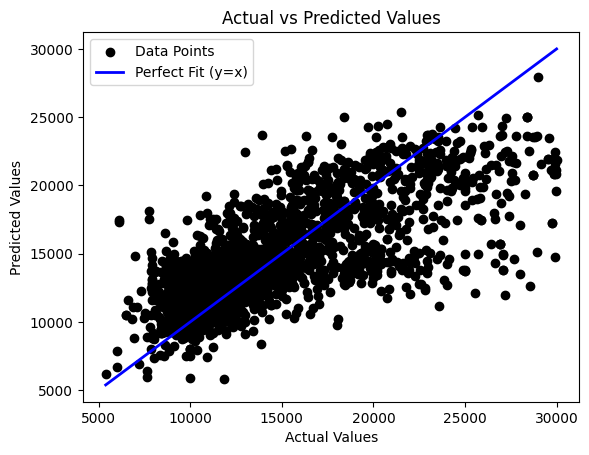

In [288]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color="black", label="Data Points")

# Plot a reference line (y = x) to show perfect predictions
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

> Decision Trees

In [289]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor()
DT_model.fit(X_train_preprocessed, y_train)

DecisionTreeRegressor()

In [290]:
y_pred_DT = DT_model.predict(X_test_preprocessed)

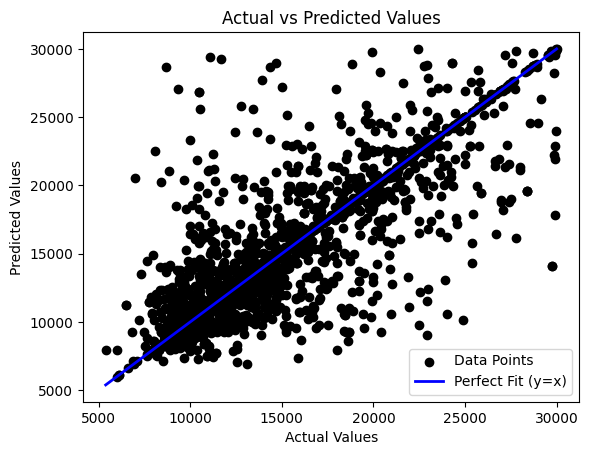

In [291]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_DT, color="black", label="Data Points")

# Plot a reference line (y = x) to show perfect predictions
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [292]:
rmse_DT = root_mean_squared_error(y_test, y_pred_DT)
rmse_DT

3001.0541375619596

> Random forest

In [313]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(max_depth=20, min_samples_split=10)
RF_model.fit(X_train_preprocessed, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=10)

In [314]:
y_pred_RF = RF_model.predict(X_test_preprocessed)

In [322]:
from sklearn.model_selection import cross_val_score

#rf_scores = cross_val_score(RF_model, X_train_preprocessed, y_train, scoring='root_mean_squared_error')

In [325]:
#max(rf_scores)

-2184.671818533845

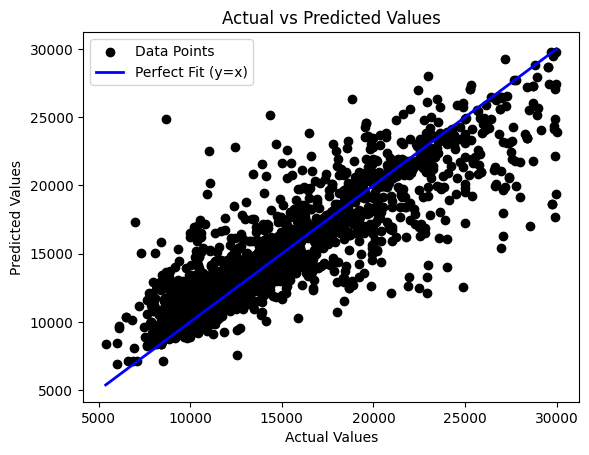

In [315]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_RF, color="black", label="Data Points")

# Plot a reference line (y = x) to show perfect predictions
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [316]:
rmse_RF = root_mean_squared_error(y_test, y_pred_RF)
rmse_RF

2344.541373893092

In [317]:
rmlse_RF = root_mean_squared_log_error(y_test, y_pred_RF)
rmlse_RF

0.1533076013238138

In [318]:
RF_model.score(X_test_preprocessed, y_test)

0.7729510678635485

KNR

In [298]:
from sklearn.neighbors import KNeighborsRegressor

knr_model = KNeighborsRegressor(n_neighbors=20)

knr_model.fit(X_train_preprocessed, y_train)

KNeighborsRegressor(n_neighbors=20)

In [299]:
y_pred_knr = knr_model.predict(X_test_preprocessed)

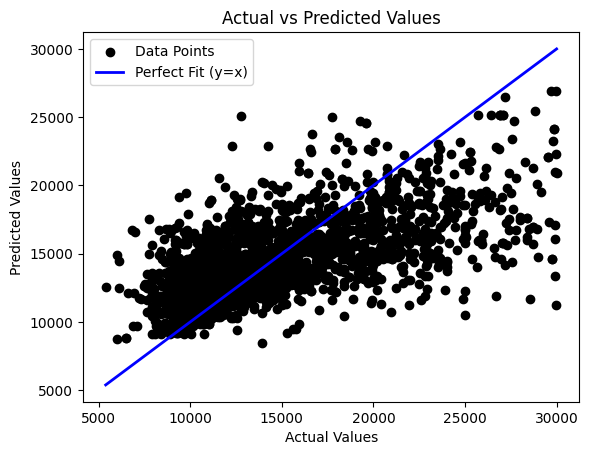

In [300]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_knr, color="black", label="Data Points")

# Plot a reference line (y = x) to show perfect predictions
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [301]:
rmse_knr = root_mean_squared_error(y_test, y_pred_knr)
rmse_knr

3813.297120591455

Gradient boosting

In [302]:
from sklearn.ensemble import GradientBoostingRegressor

model_GB = GradientBoostingRegressor()
model_GB.fit(X_train_preprocessed, y_train)

GradientBoostingRegressor()

In [303]:
y_pred_GB = model_GB.predict(X_test_preprocessed)

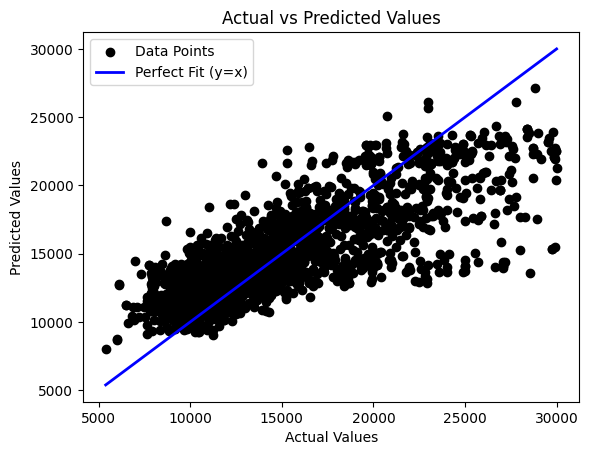

In [304]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_GB, color="black", label="Data Points")

# Plot a reference line (y = x) to show perfect predictions
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color="blue", linewidth=2, label="Perfect Fit (y=x)")

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [305]:
rmse_GB = root_mean_squared_error(y_test, y_pred_GB)
rmse_GB

3081.8514997203365